## Exploring NBA Player Performance: A Data Driven Approach to 3-Point Efficiency, Trade Potential, and Top Performers

## Introduction

#### *Purpose:*

The purporse of the notebook is to showcase the application of sports analytics tools to analyze basketball performance.

In this Project I'll be using a dataset from Basketall Reference for data collection, exploratory data analysis, modeling and key insights.

#### *Objectives:*
1. Determine which position is most efficient at shooting 3-pointers for each team.
2. Evaluate the potential for free-agent signings/trades by examining total points, assists, and rebounds.
3. Identify top players and compare key stats.

## Data Collection

In [207]:
# First I want to load and inspect the dataset 
import pandas as pd
df = pd.read_csv('nba.dataset..2024.csv')
df.head()


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,1.0,Luka Dončić,24.0,DAL,PG,70.0,70.0,2624.0,804.0,1652.0,...,647.0,686.0,99.0,38.0,282.0,149.0,2370.0,21.0,MVP-3CPOY-6ASNBA1,doncilu01
1,2.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,1487.0,...,415.0,465.0,150.0,67.0,162.0,184.0,2254.0,0.0,MVP-2DPOY-7CPOY-3ASNBA1,gilgesh01
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,1369.0,...,841.0,476.0,87.0,79.0,250.0,210.0,2222.0,10.0,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01
3,4.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,1648.0,...,278.0,519.0,70.0,13.0,186.0,144.0,2212.0,0.0,MVP-5CPOY-5ASNBA2,brunsja01
4,5.0,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,...,976.0,708.0,108.0,68.0,237.0,194.0,2085.0,25.0,MVP-1CPOY-4ASNBA1,jokicni01


In [49]:
# Then I want to explore and clean the data if neccessary. 
# I know the dataset is good but I'll double check all columns are represented.
df.columns


Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Trp-Dbl', 'Awards', 'Player-additional'],
      dtype='object')

In [44]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])


  ## Exploratory Data Analysis (EDA)
Descriptive statistics and visualizations to explore the data

#### *Visual Relationships:*

  

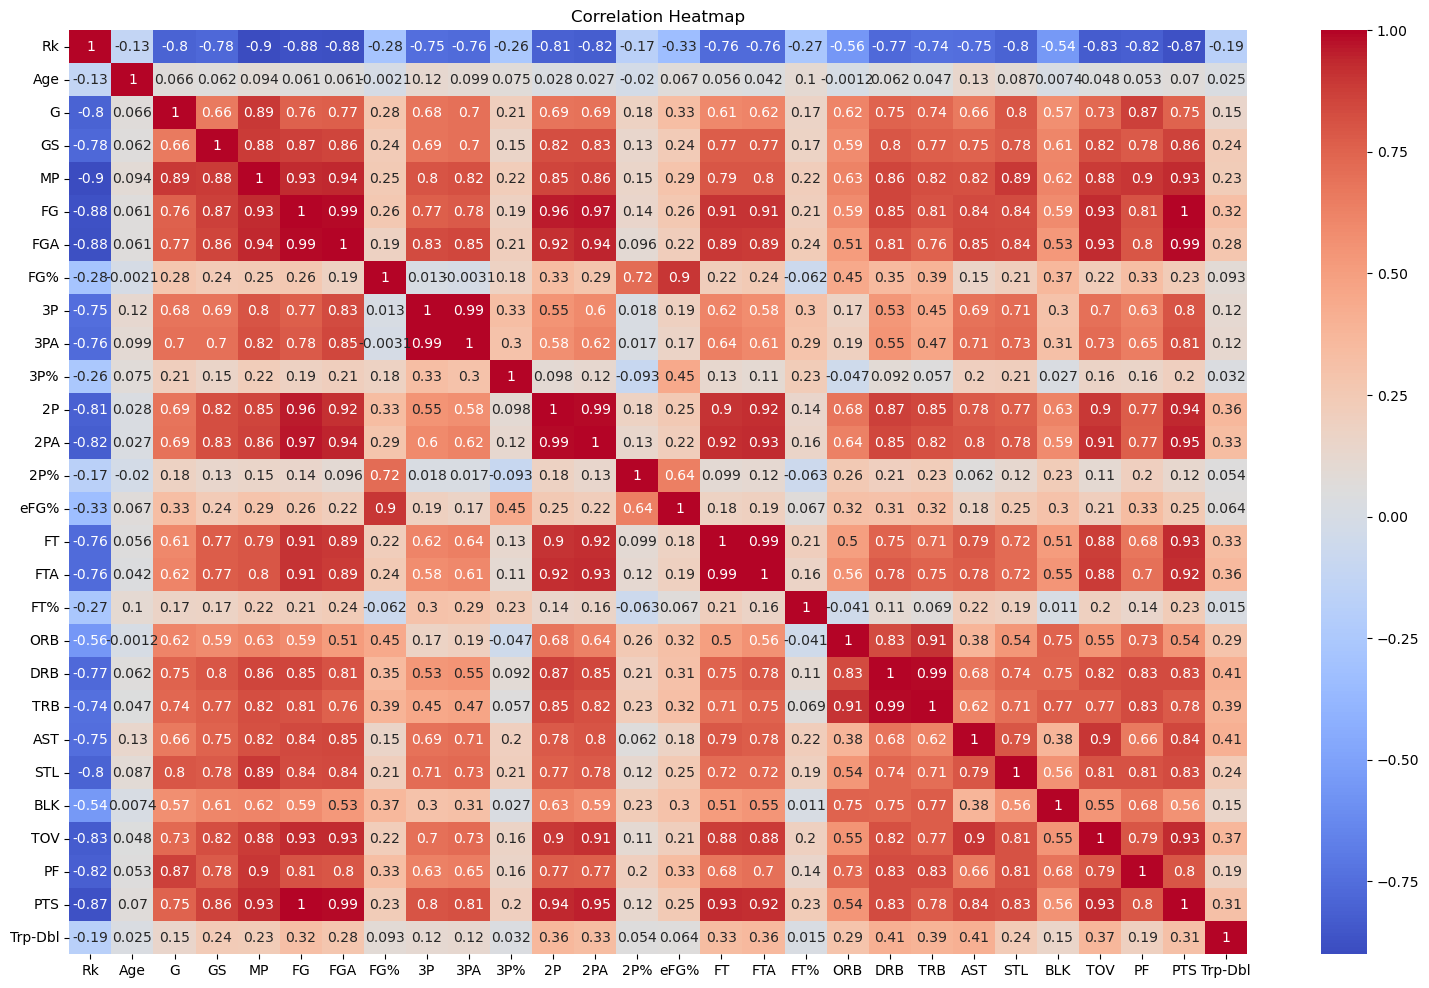

In [91]:
# I'm using a Correlation heatmaps to explore relationships between metrics (e.g, 3-point attempts and efficiency).

plt.figure(figsize=(19, 12))  # I needed to adjust the ssize of the heatmap for clarity
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Analysis Objectives

#### *Objective 1: Most Efficient 3-Point Shooting Position for Each Team*

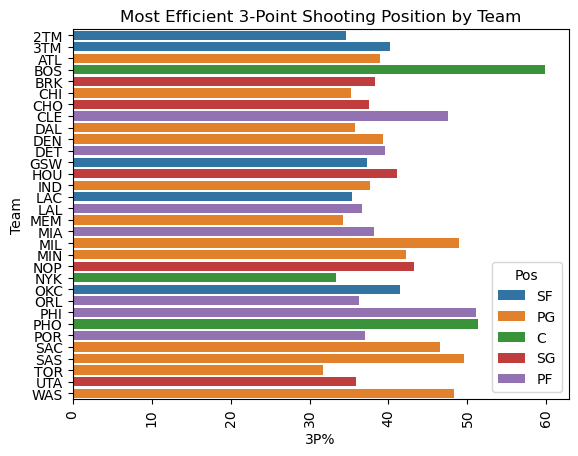

In [200]:
# 1. Calculate Shooting Efficiency
df['3P%'] = df['3P'] / df['3PA'] * 100

# 2. Group By Team and Position
position_efficiency = df.groupby(['Team', 'Pos'])['3P%'].mean().reset_index()

# 3. Identify Best Position For Each Team
best_positions = position_efficiency.loc[position_efficiency.groupby('Team')['3P%'].idxmax()]

# 4 Visualize The  Results
sns.barplot(y='Team', x='3P%', hue='Pos', data=best_positions)
plt.title('Most Efficient 3-Point Shooting Position by Team')
plt.xticks(rotation=90)
plt.show()



#### *Objective 2: Evaluating Free Agents or Trade Candidates*

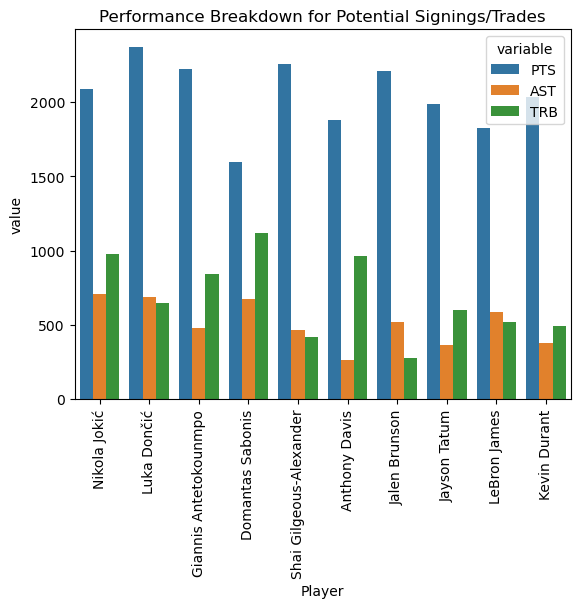

In [203]:
# 1. Aggregate Performance Metrics (Points, rebounds, assist, games played, 3pt%, effective field goal %)
df['total_performance'] = df['PTS'] + df['AST'] + df['TRB'] + df['eFG%'] + df['G'] + df['3P%']

# 2. Identify Top Free-Agent/Trade Candidates
potential_signings = df.sort_values(by='total_performance', ascending=False).head(10)

# 3. Visualize The Results
top_players = potential_signings[['Player', 'PTS', 'AST', 'TRB', ]].melt(id_vars='Player')
sns.barplot(x='Player', y='value', hue='variable', data=top_players)
plt.title('Performance Breakdown for Potential Signings/Trades')
plt.xticks(rotation=90)
plt.show()


#### *Objective 3: Compare Top Players*

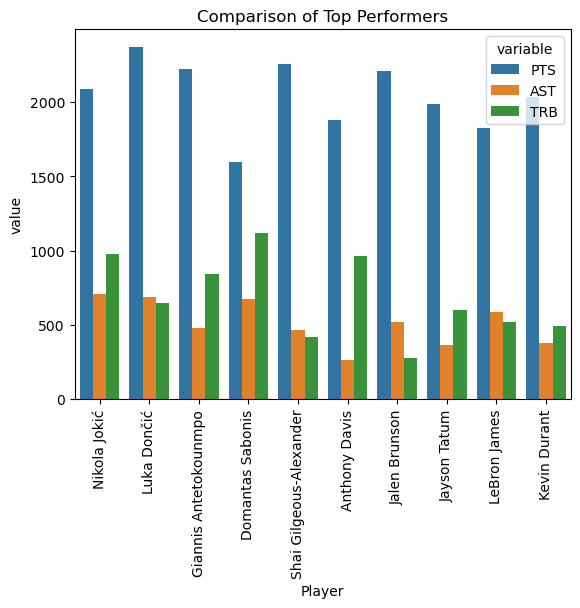

In [205]:
# 1. Now lets compare top performers to see how they stack up
top_comparison = top_performers[['Player', 'PTS', 'AST', 'TRB']].melt(id_vars='Player')
sns.barplot(x='Player', y='value', hue='variable', data=top_comparison)
plt.title('Comparison of Top Performers')
plt.xticks(rotation=90)
plt.show()


## Key Insights

1. **3-Point Efficiency:**
   I was interested to see that the PG position had the best 3pt efficiency on the majority of NBA teams. However, I was suprised to learn from the heatmap, a strong positive correlation between 3P, 3PA, and Stl. This shows a possible link to 3pt efficiency and the PG position, due to increased 3 point shots, 3 point shots in transition and 3 point shots earlier in the shot clock. All scenariors in which a PG would be featured.

2. **Free-Agent/Trade Potential:**
   Based on the aggregate metrics, the most valuable players to me are Nikola Jokic, Lebron James, Luca Doncic, and Domantis Sabonis. Each of the players are impactful in each areas, providing a team with flexibility and playmaking on offense ans transition.

3. **Player Comparision:**
   In terms of scoring, playmaking and rebounding these players where pretty effcienct. However, Nikola Jokic and Luka Doncic stand out for their impressive ability to do all three at league leading levels, while not bieng touted for 
their athleticism or explosiveness.


#### *Front Office Implications:*
These insights can provide context and depth to player analysis and how a player could fit within a system or be utilize in new ways.  It could also enhance a team's defensive strategy by understanding correlation between steals and 3pts. All of which can aid in front-office decisions.